# 1D Ising - Regression

We copy the demonstration code from the lecture and instead of using the score function we will compute $E_{\text{out}}$ using mean the mean square error.

In [11]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [12]:
L=40

# create 10000 random Ising states
states=np.random.choice([-1, 1], size=(10000,L))

def ising_energies(states,L):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    J=np.zeros((L,L),)
    for i in range(L):
        J[i,(i+1)%L]-=1.0
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states)

    return E
# calculate Ising energies
energies=ising_energies(states,L)


In [13]:
# reshape Ising states into RL samples: S_iS_j --> X_p
states=np.einsum('...i,...j->...ij', states, states)
shape=states.shape
states=states.reshape((shape[0],shape[1]*shape[2]))
# build final data set
Data=[states,energies]

In [14]:
def get_train_and_test_data(n_samples):
    x_train=Data[0][:n_samples]
    y_train=Data[1][:n_samples] #+ np.random.normal(0,4.0,size=X_train.shape[0])
    x_test=Data[0][n_samples:3*n_samples//2]
    y_test=Data[1][n_samples:3*n_samples//2] #+ np.random.normal(0,4.0,size=X_test.shape[0])

    return x_test, x_train, y_test, y_train

def get_e_out(lambdas, sample_size):
    # define train and test data sets
    X_test, X_train, Y_test, Y_train = get_train_and_test_data(sample_size)
    # set up Lasso and Ridge Regression models
    leastsq=linear_model.LinearRegression()
    ridge=linear_model.Ridge()
    lasso = linear_model.Lasso()
    # define error lists
    test_errors_leastsq = []
    test_errors_ridge = []
    test_errors_lasso = []
    # set refularisations trength values

    for lmbda in lambdas:

        ### ordinary least squares
        leastsq.fit(X_train, Y_train) # fit model
        # Instead of using the score function like in the lecture we use mean square error
        test_errors_leastsq.append(mean_squared_error(Y_test, leastsq.predict(X_test)))

        ### apply Ridge regression
        ridge.set_params(alpha=lmbda) # set regularisation parameter
        ridge.fit(X_train, Y_train) # fit model
        # Instead of using the score function like in the lecture we use mean square error
        test_errors_ridge.append(mean_squared_error(Y_test, ridge.predict(X_test)))

        ### apply Lasso regression
        lasso.set_params(alpha=lmbda) # set regularisation parameter
        lasso.fit(X_train, Y_train) # fit model
        # Instead of using the score function like in the lecture we use mean square error
        test_errors_lasso.append(mean_squared_error(Y_test, lasso.predict(X_test)))
    return test_errors_lasso, test_errors_leastsq, test_errors_ridge

def plot_errors(test_errors_lasso, test_errors_leastsq, test_errors_ridge, lmbdas, sample_size):
    # Plot our performance on both the training and test data
    plt.semilogx(lmbdas, test_errors_leastsq,'b',label='E_out (OLS)')
    plt.semilogx(lmbdas, test_errors_ridge,'r',label='E_out (Ridge)')
    plt.semilogx(lmbdas, test_errors_lasso, 'g',label='E_out (LASSO)')

    fig = plt.gcf()
    fig.set_size_inches(10.0, 6.0)

    plt.legend(loc='lower right',fontsize=16)
    plt.xlim([min(lmbdas), max(lmbdas)])
    plt.xlabel(r'$\lambda$',fontsize=16)
    plt.ylabel('Mean square error',fontsize=16)
    plt.tick_params(labelsize=16)
    plt.title("E_out for sample size {size}".format(size=sample_size))
    plt.show()

C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.449688701606053, tolerance: 1.8821248000000002
  positive)
C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.598284526935949, tolerance: 4.0179456
  positive)


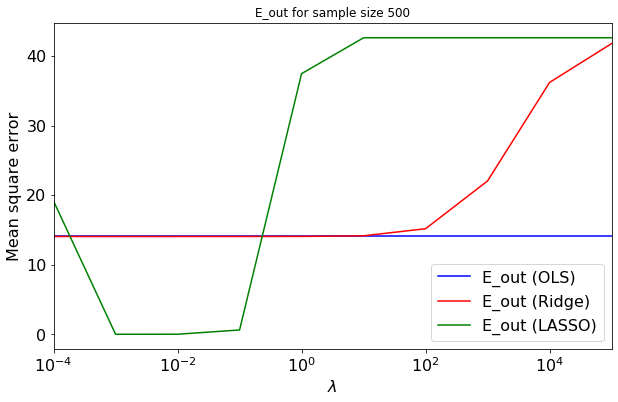

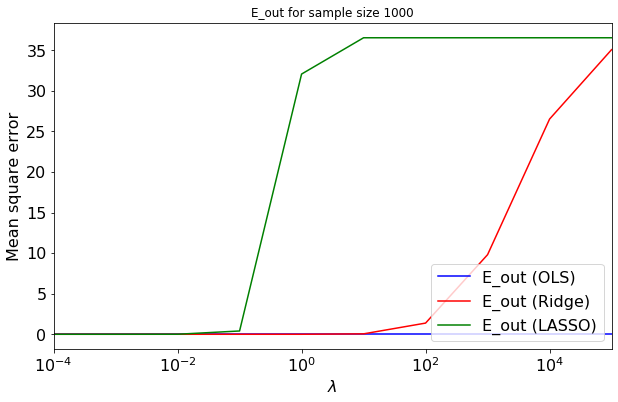

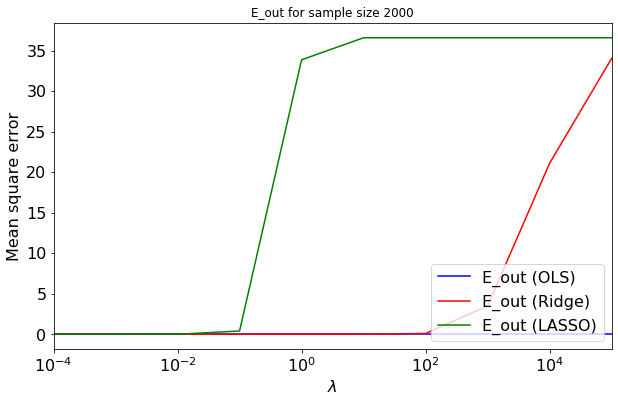

In [15]:
# define different sample sizes
sample_sizes= [500, 1000, 2000]
lambdas = np.logspace(-4, 5, 10)

for sample_size in sample_sizes:

    error_out_lasso, error_out_leastsq, error_out_ridge = get_e_out(lambdas, sample_size)
    plot_errors(error_out_lasso, error_out_leastsq, error_out_ridge, lambdas, sample_size)

As we can see in the plots above $E_{\text{out}}$ for Ridge and Lasso increases with $\lambda$, although the Ridge model is similar to the ordinary least square for $\lambda < 10^2 $. $E_{\text{out}}$ for the ordinary least square model stays the same, since it is not dependent on $\lambda$. As we increase the number of samples the total value of $E_{\text{out}}$ decreases for small $\lambda$ but the qualitative behaviour stays the same.